<a href="https://colab.research.google.com/github/Rama389/AI-Projects/blob/main/Statistical_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Standard Libraries

In [ ]:
import pandas as pd # Import pandas library
import numpy as np # Import numpy library

np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True' # this prevents kernel crashes

### <span style="color:orange;">Q1 Solution</span>

In [ ]:
# Import the csv file
data = pd.read_csv('SA1_Group_4.csv')

# Convert column names to lowercase
data.columns = data.columns.str.lower()

# Verify data set columns to know if format aligns with our requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 65 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             10000 non-null  int64 
 1   sl_no             10000 non-null  object
 2   st_code           10000 non-null  int64 
 3   dist_code         10000 non-null  int64 
 4   ttm_code          10000 non-null  object
 5   sector_code       10000 non-null  int64 
 6   vt_code           10000 non-null  object
 7   worked_for_1d     10000 non-null  int64 
 8   closed_y          10000 non-null  object
 9   oper_dur_mm       10000 non-null  int64 
 10  oper_dur_dd       10000 non-null  object
 11  survey_code       10000 non-null  int64 
 12  nic_code          10000 non-null  int64 
 13  perm_reg_y        10000 non-null  object
 14  factory_act       10000 non-null  int64 
 15  init_prod_y       10000 non-null  object
 16  unit_type         10000 non-null  int64 
 17  anci_unit    

<ipython-input-5-9e2d421c052a>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('SA1_Group_4.csv')


In [ ]:
# Store the original float format to reset later
original_float_format = pd.options.display.float_format

# Suppress scientific notation
pd.options.display.float_format = '{:.4f}'.format

# obtain summary statistics for variable of our interest : gop_year3 (i.e. Gross output – Year 3 (Rs)
data['gop_year3'].describe()

# # Restore the original float format
# pd.options.display.float_format = original_float_format


count          10000.0000
mean        93460501.3193
std       9081372726.8234
min                0.0000
25%            46500.0000
50%           100000.0000
75%           374250.0000
max     908105000000.0000
Name: gop_year3, dtype: float64

#### Gross output – Year 3 (Rs) variable has unusually high values so we need to remove outliers from this column

#### Method 1 : Based on Box-Plot (1.5*IQR method)
#### Based on this method we will end up removing 16.48% of sample from analysis which is significant and will under-represent data with loss of information hence not moving ahead with thsi approach

In [ ]:
# Calculate IQR
Q1 = data['gop_year3'].quantile(0.25)
Q3 = data['gop_year3'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_1 = data[(data['gop_year3'] < lower_bound) | (data['gop_year3'] > upper_bound)]

# Proportion of outliers to total sample size
print('Number of outliers to be removed : ', len(outliers_1), ',', 'Proportion of outliers in sample size : ', len(outliers_1)/len(data))

Number of outliers to be removed :  1648 , Proportion of outliers in sample size :  0.1648


#### Method 2 : Based on Z score
#### Based on this method we will end up removing just 1 observation as outlier which is not reasonable as there are still extreme values in the data which are very unusual given typicall output of SSI sector unit is concerned; additionally this approach works well only when data is symmetric or normally distributed which is not the case here hence we will not use even this approach

In [ ]:
from scipy.stats import zscore

z_scores = zscore(data['gop_year3'])
outliers_2 = data[(abs(z_scores) > 3)]  # typically |z| > 3 are considered outliers

# Proportion of outliers to total sample size
print('Number of outliers to be removed : ', len(outliers_2), ',', 'Proportion of outliers in sample size : ', len(outliers_2)/len(data))

Number of outliers to be removed :  1 , Proportion of outliers in sample size :  0.0001


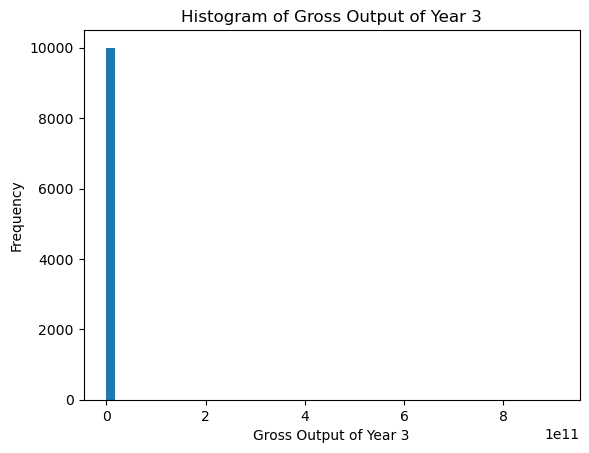

In [ ]:
# plot of histogram of gross output year 3 to observe distribution
import matplotlib.pyplot as plt
import numpy as np

# Plotting a basic histogram
plt.hist(data['gop_year3'], bins=50)
plt.xlabel('Gross Output of Year 3')
plt.ylabel('Frequency')
plt.title('Histogram of Gross Output of Year 3')
plt.show()


##### In above histogram all values are fallen into one bin which indicates that presence of few extreme outliers in the data

In [ ]:
# Calculate skewness using pandas
skewness_pandas = data['gop_year3'].skew()
print("Skewness (Pandas):", skewness_pandas)

Skewness (Pandas): 99.98852592676145


##### Above value indicates distribution is highly skewed to right

#### Method 3 : Removing outliers using the lower and upper 1% percentile
#### This approach does not assume normal or symmetric distribution. Removes the most extreme 1% on either end, which are often data entry errors or rare cases that could skew your mean or confidence intervals.

In [ ]:
lower = data['gop_year3'].quantile(0.01)
upper = data['gop_year3'].quantile(0.99)

outliers_3 = data[(data['gop_year3'] < lower) | (data['gop_year3'] > upper)]

# Proportion of outliers to total sample size
print('Number of outliers to be removed : ', len(outliers_3), ',', 'Proportion of outliers in sample size : ', len(outliers_3)/len(data))

# Filter data
clean_data = data[(data['gop_year3'] >= lower) & (data['gop_year3'] <= upper)]

Number of outliers to be removed :  200 , Proportion of outliers in sample size :  0.02


In [ ]:
clean_data['gop_year3'].describe()

,gop_year3
count,9.800000e+03
mean,8.709599e+05
std,2.874787e+06
min,2.800000e+03
25%,4.800000e+04
50%,1.000000e+05
75%,3.595920e+05
max,3.260910e+07


#### CI for gop_year3 (i.e. Gross output – Year 3 (Rs))

In [ ]:
import numpy as np
from scipy import stats

# Sample size, mean, and standard error
n = len(clean_data)
mean = np.mean(clean_data['gop_year3'])
se = stats.sem(clean_data['gop_year3'])  # Standard error of the mean

# 95% confidence interval using t-distribution
confidence_level = 0.95
dfree = n - 1  # degrees of freedom
Confidence_Interval = stats.t.interval(confidence_level, dfree, loc=mean, scale=se)

print(f"Mean: {mean:.2f}")
print(f"95% Confidence Interval: ({Confidence_Interval[0]:.2f}, {Confidence_Interval[1]:.2f})")

Mean: 870959.90
95% Confidence Interval: (814036.03, 927883.77)


### <span style="color:orange;">Q3 Solution</span>

In [ ]:
# Calculate 2 metrics

# Gross output per Rs. 1 lakh investment in plant and machinery
data['metric1_gop_year3_per_pur_val'] = data['gop_year3'][data['ori_purc_val_pm']>0]/(data['ori_purc_val_pm'][data['ori_purc_val_pm']>0]/100000)

# Net worth per employee
data['metric2_net_year3_per_employee'] = data['net_year3']/data['emp_total']


#### CI for metric 1 (i.e. Gross output per Rs. 1 lakh investment in plant and machinery)

In [ ]:
# Removing outliers using the lower and upper 1% percentile
lower = data['metric1_gop_year3_per_pur_val'].quantile(0.01)
upper = data['metric1_gop_year3_per_pur_val'].quantile(0.99)

# Filter data
clean_data_1 = data[(data['metric1_gop_year3_per_pur_val'] >= lower) & (data['metric1_gop_year3_per_pur_val'] <= upper)]

# Sample size, mean, and standard error
n = len(clean_data_1)
mean = np.mean(clean_data_1['metric1_gop_year3_per_pur_val'])
se = stats.sem(clean_data_1['metric1_gop_year3_per_pur_val'])  # Standard error of the mean

# 99% confidence interval using t-distribution
confidence_level = 0.99
dfree = n - 1  # degrees of freedom
Confidence_Interval = stats.t.interval(confidence_level, dfree, loc=mean, scale=se)

print(f"Mean: {mean:.2f}")
print(f"99% Confidence Interval: ({Confidence_Interval[0]:.2f}, {Confidence_Interval[1]:.2f})")

Mean: 519238.56
99% Confidence Interval: (495218.65, 543258.47)


#### CI for metric 2 (i.e. Net worth per employee)

In [ ]:
# Removing outliers using the lower and upper 1% percentile
lower = data['metric2_net_year3_per_employee'].quantile(0.01)
upper = data['metric2_net_year3_per_employee'].quantile(0.99)

# Filter data
clean_data_2 = data[(data['metric2_net_year3_per_employee'] >= lower) & (data['metric2_net_year3_per_employee'] <= upper)]

# Sample size, mean, and standard error
n = len(clean_data_2)
mean = np.mean(clean_data_2['metric2_net_year3_per_employee'])
se = stats.sem(clean_data_2['metric2_net_year3_per_employee'])  # Standard error of the mean

# 99% confidence interval using t-distribution
confidence_level = 0.99
dfree = n - 1  # degrees of freedom
Confidence_Interval = stats.t.interval(confidence_level, dfree, loc=mean, scale=se)

print(f"Mean: {mean:.2f}")
print(f"99% Confidence Interval: ({Confidence_Interval[0]:.2f}, {Confidence_Interval[1]:.2f})")

Mean: 96103.61
99% Confidence Interval: (92355.25, 99851.96)


### <span style="color:orange;">Q5 Solution</span>

In [ ]:
# descriptive statistics of value of export in year 3
data['voe_year3'].describe()

count       10000.0000
mean       106843.8266
std       5521842.4900
min             0.0000
25%             0.0000
50%             0.0000
75%             0.0000
max     485951000.0000
Name: voe_year3, dtype: float64

In [ ]:
# population mean assumption
population_mean = 87300

# sample size , sample mean and SE of sample mean
n = len(data['voe_year3']) # sample size
se = stats.sem(data['voe_year3']) # standard error of sample mean
sample_mean = np.mean(data['voe_year3']) # sample mean

# One-sided t-test (greater than population mean)
t_stat = (sample_mean - population_mean) / se
p_value = 1 - stats.t.cdf(t_stat, df=n-1)

# Interpret
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: sample mean is significantly greater than population mean")
else:
    print("Accept the null hypothesis")


NameError: name 'data' is not defined